## 🧪 Simulación_con_selección.ipynb

**Autor:** Johanna Atenea Carreon Baltazar  
**Contacto:** johannaatenea13@gmail.com  
**Fecha de última modificación:** junio de 2025

---

### 🎯 Objetivo

Simular genomas artificiales de cianobacterias para evaluar si la distribución observada las familias de genes expandidas en los genomas reales podría explicarse por una distribución **aleatoria** de genes de familias génicas expandidas.  
La idea es generar 29 genomas ficticios con características similares a los genomas reales del estudio (tamaño y número de genes de familias expandidas) y analizar si la **estructura de genes de familias expandidas** difiere de lo observado en los datos reales.

---

### ⚙️ Descripción general

1. **Cálculo de estadísticas reales**:  
   Se calcula la media del tamaño medido en  y la media del número de genes de familias expandidas por genoma, con base en los datos reales.

2. **Simulación de genomas ficticios**:  
   Se generan 29 genomas artificiales con el mismo número de posiciones (genes) que el promedio observado. En cada uno, se **seleccionaron genes con distriución uniforme** del genoma y se les etiqueto como genes de familias expandidas.

3. **Cálculo de distancias**:  
   Se repiten los cálculos de distancias entre genes pertenecientes a familias de genes expandidas, como en los notebooks `Diferencias_entre_duplicados_en_num_genes.ipynb` y `Diferencias_entre_duplicados_en_pb.ipynb`, pero ahora sobre los genomas simulados.

4. **Visualización**:  
   Se construyen **histogramas, ajustes estadísticos y QQ-plots** tanto para los datos sin transformar como para datos con **transformación logarítmica**, permitiendo comparar la estructura simulada con la observada.

---

### 📥 Entradas requeridas

- Valores promedio de:
  - Tamaño genómico (kb)
  - Número de genes duplicados por genoma (de familias expandidas)

---

### 📤 Salidas generadas

- Genomas simulados con genes duplicados distribuidos aleatoriamente
- Histogramas de distancias entre duplicados
- Ajustes de distribuciones a los datos simulados
- Comparaciones visuales entre simulaciones y datos reales mediante histogramas y QQ-plots

---

### 🧰 Librerías requeridas

```python
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
from scipy.stats import johnsonsu, kstest
from scipy.stats import johnsonsu, kstest


In [1]:
import pickle
from collections import Counter
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Resultados con k-means

De acuerdo a los resultados obtenidos cuando se uso K-means para la identificación de genes secundarios, se obtuvo total de 871 genes copia y una media de 33 genes secundarios por genoma.
De manera similar con este criterio se obtuvo 65  genes primarios como media por genoma


### Resultados del ajuste de distribuciones
Los resultados para las diferencias entre genes duplicados usando K-means son los siguientes:

| Distribución | AIC      | KS-Statistic | KS-pvalue | Parámetros                      |
|--------------|----------|--------------|-----------|---------------------------------|
| gamma        | 10754.60 | 0.0415       | 0.1025    | [0.691, 0.000, 303.141]         |
| weibull_min  | 10765.16 | 0.0498       | 0.0278    | [0.796, 0.000, 185.855]         |
| expon        | 10833.53 | 0.0906       | 0.0000    | [1.000, 208.611]                |
| lognorm      | 10929.79 | 0.0788       | 0.0000    | [1.301, -6.989, 111.459]        |
Como se observa la única distribución aceptable para modelar las diferencias es la gamma.

## Resultados con umbrales

De acuerdo a los resultados obtenidos cuando se uso el criterio de umbrales para la identificación de genes secundarios, se obtuvo total de 1232 genes copia y una media de 47  genes secundarios por genoma.
De manera similar con este criterio se obtuvo 50 genes primarios como media por genoma
### Resultados del ajuste de distribuciones
Los resultados de acuerdo al ajuste para el histograma de la diferencia entre genes duplicados contados en número de genes, fueron los siguientes:

| Distribución | AIC       | KS-Statistic | KS-pvalue | Parámetros                       |
|--------------|-----------|--------------|-----------|----------------------------------|
| gamma        | 14692.99  | 0.0247       | 0.4330    | [0.798, 0.0, 182.017]            |
| weibull_min  | 14698.80  | 0.0297       | 0.2220    | [0.873, 0.0, 136.058]            |
| expon        | 14718.73  | 0.0656       | 0.0000    | [1.0, 144.299]                   |
| lognorm      | 14873.86  | 0.0560       | 0.0008    | [1.154, -6.982, 87.555]          |


Como se puede observar, los modelos aceptados fueron la distribución gamma en primer lugar y en segundo la distribución weibull_min, por tanto, se usará esta para modelar la inserción de los genes duplicados en la simulación.

## Estadísticas de número de genes por genoma

In [12]:
ruta = 'numero_de_genes.csv'
numero_de_genes = pd.read_csv("numero_de_genes.csv", delimiter=',')
print(numero_de_genes.head())

    genome_id  number_of_genes
0   103690.82             5854
1  1472755.90             7399
2  1618022.90             7179
3  1647413.14             5966
4  1751286.15             5882


In [13]:
# Calcular la media del número de genes por genoma
media_genes = numero_de_genes['number_of_genes'].mean()
print(f"Media de genes por genoma: {media_genes:.2f}")

Media de genes por genoma: 6726.90


## Simular una población de cianobacterias

In [31]:
def simulador_de_genes(numero_genes):
    return [f"gene_{i+1}" for i in range(numero_genes)]

def seleccionar_genes(genoma, n):
    seleccionados = random.sample(genoma, n)
    return seleccionados

def genes_duplicados_azar(genes_a_duplicar, genoma):
    for gen in genes_a_duplicar:
        # Buscar una posición aleatoria para insertar el duplicado
        posicion = random.randint(0, len(genoma))
        duplicado = gen + ".2"
        genoma.insert(posicion, duplicado)

def inicializar_poblacion(numero_genes, num_especies, cantidad_de_genes_duplicados):
    especies = []
    for _ in range(num_especies):
        genoma = simulador_de_genes(numero_genes)
        genes_a_duplicar = seleccionar_genes(genoma, cantidad_de_genes_duplicados)
        genes_duplicados_azar(genes_a_duplicar, genoma)
        especies.append(genoma)
    return especies

In [36]:
# Parámetros
numero_genes = 6726
num_especies = 29
cantidad_de_genes_duplicados = 33
#Fijar la semilla para reproducibilidad
random.seed(42)
poblacion = inicializar_poblacion(numero_genes, num_especies, cantidad_de_genes_duplicados)

# Crear diccionario con posiciones de genes duplicados
diccionario_duplicados = {}

for i, genoma in enumerate(poblacion):
    clave = f"genoma_{i+1}"
    posiciones = [j for j, gen in enumerate(genoma) if gen.endswith('.2')]
    diccionario_duplicados[clave] = posiciones

In [37]:
print(diccionario_duplicados)

{'genoma_1': [53, 355, 645, 761, 794, 841, 1023, 1279, 1314, 1769, 2169, 2285, 2290, 2401, 2765, 2799, 2822, 2946, 3102, 3121, 3479, 3767, 4396, 4523, 4851, 4954, 5741, 5984, 6241, 6272, 6620, 6628, 6660], 'genoma_2': [262, 459, 542, 1341, 1728, 1741, 1804, 1880, 2013, 2196, 2219, 2578, 2589, 2665, 3120, 3241, 3292, 3801, 4090, 4394, 4576, 4650, 5258, 5266, 5372, 5624, 5656, 5887, 6000, 6310, 6372, 6607, 6747], 'genoma_3': [26, 95, 871, 915, 941, 1297, 1464, 2066, 2159, 2191, 2409, 2444, 2794, 3567, 3721, 3849, 4103, 4160, 4351, 4412, 4549, 4902, 5123, 5234, 5265, 5591, 5602, 5903, 5924, 5926, 6170, 6247, 6315], 'genoma_4': [172, 525, 993, 1054, 1355, 1650, 1739, 1842, 1885, 2034, 2179, 2559, 2771, 3066, 3276, 3478, 3595, 3705, 3910, 4247, 4338, 4431, 4523, 4538, 4821, 4988, 5336, 5430, 5516, 5669, 5857, 5999, 6208], 'genoma_5': [443, 496, 617, 802, 809, 897, 1150, 1505, 1562, 1574, 2042, 2048, 2284, 2789, 2916, 3309, 3382, 3461, 3486, 3550, 3631, 3683, 3793, 3844, 4403, 4509, 5313, 53

In [38]:
# Guardar el diccionario
with open('posiciones_duplicados.pkl', 'wb') as f:
    pickle.dump(diccionario_duplicados, f)

## Calcular diferencias entre genes duplicados

In [39]:
# Función para calcular las diferencias con circularidad
def calcular_diferencias_circulares(posiciones, num_genes):
    posiciones_ordenadas = sorted(posiciones)
    diferencias = []
    for i in range(1, len(posiciones_ordenadas)):
        diferencia = (posiciones_ordenadas[i] - posiciones_ordenadas[i - 1])
        diferencias.append(diferencia)
    # Circularidad: entre último y primero
    diferencia_circular = (posiciones_ordenadas[0] - posiciones_ordenadas[-1] + num_genes)
    diferencias.append(diferencia_circular)
    return diferencias

In [40]:
# Diccionario de salida con las diferencias
resultados_diferencias_duplicados = {}

# Aplicar la función a cada genoma en tu diccionario
for genome_id, posiciones in diccionario_duplicados.items():
    diferencias = calcular_diferencias_circulares(posiciones, numero_genes)
    resultados_diferencias_duplicados[genome_id] = diferencias

In [41]:
print(resultados_diferencias_duplicados)

{'genoma_1': [302, 290, 116, 33, 47, 182, 256, 35, 455, 400, 116, 5, 111, 364, 34, 23, 124, 156, 19, 358, 288, 629, 127, 328, 103, 787, 243, 257, 31, 348, 8, 32, 119], 'genoma_2': [197, 83, 799, 387, 13, 63, 76, 133, 183, 23, 359, 11, 76, 455, 121, 51, 509, 289, 304, 182, 74, 608, 8, 106, 252, 32, 231, 113, 310, 62, 235, 140, 241], 'genoma_3': [69, 776, 44, 26, 356, 167, 602, 93, 32, 218, 35, 350, 773, 154, 128, 254, 57, 191, 61, 137, 353, 221, 111, 31, 326, 11, 301, 21, 2, 244, 77, 68, 437], 'genoma_4': [353, 468, 61, 301, 295, 89, 103, 43, 149, 145, 380, 212, 295, 210, 202, 117, 110, 205, 337, 91, 93, 92, 15, 283, 167, 348, 94, 86, 153, 188, 142, 209, 690], 'genoma_5': [53, 121, 185, 7, 88, 253, 355, 57, 12, 468, 6, 236, 505, 127, 393, 73, 79, 25, 64, 81, 52, 110, 51, 559, 106, 804, 61, 164, 444, 15, 577, 47, 548], 'genoma_6': [86, 55, 5, 12, 20, 54, 6, 96, 324, 312, 231, 269, 133, 89, 428, 136, 729, 606, 214, 39, 193, 98, 208, 75, 23, 36, 69, 12, 190, 467, 514, 98, 899], 'genoma_7':

In [39]:
for genoma, posiciones in diccionario_duplicados.items():
    print(f"{genoma}: {posiciones[:10]}")  # Muestra las 10 primeras posiciones de cada genoma


genoma_1: [425, 582, 778, 1071, 1134, 1184, 1264, 1439, 1747, 2024]
genoma_2: [1075, 1691, 1732, 2134, 2217, 2239, 2586, 2609, 2641, 2791]
genoma_3: [148, 309, 497, 1519, 1723, 1979, 2121, 2251, 2433, 2520]
genoma_4: [226, 409, 999, 1093, 1332, 1417, 1490, 1747, 1886, 1914]
genoma_5: [380, 578, 737, 768, 1003, 1012, 1172, 1805, 1808, 2091]
genoma_6: [19, 43, 153, 720, 848, 1159, 1388, 1446, 1616, 1696]
genoma_7: [47, 232, 256, 1138, 1282, 1463, 1504, 1522, 2423, 2617]
genoma_8: [174, 451, 563, 650, 1294, 1588, 1969, 2008, 2108, 2111]
genoma_9: [45, 53, 280, 761, 915, 922, 1394, 1456, 1616, 1794]
genoma_10: [68, 272, 278, 814, 833, 1394, 1700, 1814, 1932, 1942]
genoma_11: [35, 597, 788, 823, 865, 867, 931, 939, 1047, 1118]
genoma_12: [210, 396, 443, 871, 1302, 1309, 1627, 1792, 2049, 2156]
genoma_13: [181, 227, 241, 356, 1021, 1471, 1865, 1944, 2140, 2304]
genoma_14: [170, 585, 762, 765, 1102, 1544, 1590, 1623, 1903, 2009]
genoma_15: [77, 312, 791, 1208, 1236, 1838, 1868, 1871, 1967, 19

## Estadisticas descriptivas para cada uno de los 29 genomas

In [42]:
import numpy as np
import pandas as pd

# Crear un nuevo diccionario para almacenar las estadísticas
estadisticas_duplicados = {}

# Calcular estadísticas para cada genoma
for id_genoma, diferencias in resultados_diferencias_duplicados.items():
    diferencias = np.array(diferencias)  # Convertir a array de NumPy
    
    # Verifica que 'diferencias' no esté vacío para evitar problemas
    if diferencias.size > 0:
        estadisticas_duplicados[id_genoma] = {
            'media (KB)': np.mean(diferencias),  # Media de las diferencias
            'mediana (KB)': np.median(diferencias),  # Mediana de las diferencias
            'desviación estándar (KB)': np.std(diferencias, ddof=1),  # Desviación estándar con ddof=1 para muestra
            'máximo (KB)': np.max(diferencias),  # Valor máximo
            'mínimo (KB)': np.min(diferencias)  # Valor mínimo
        }
    else:
        # Si no hay diferencias (lista vacía), asignar valores NaN
        estadisticas_duplicados[id_genoma] = {
            'media (KB)': np.nan,
            'mediana (KB)': np.nan,
            'desviación estándar (KB)': np.nan,
            'máximo (KB)': np.nan,
            'mínimo (KB)': np.nan
        }

# Convertir a DataFrame
df_estadisticas_duplicados = pd.DataFrame.from_dict(estadisticas_duplicados, orient='index')

# Mostrar el DataFrame
df_estadisticas_duplicados


,media (KB),mediana (KB),desviación estándar (KB),máximo (KB),mínimo (KB)
genoma_1,203.818182,127.0,186.329254,787,5
genoma_2,203.818182,140.0,185.551788,799,8
genoma_3,203.818182,137.0,205.107968,776,2
genoma_4,203.818182,167.0,140.311140,690,15
genoma_5,203.818182,106.0,213.320688,804,6
genoma_6,203.818182,98.0,223.065637,899,5
genoma_7,203.818182,119.0,191.568437,743,12
genoma_8,203.818182,140.0,199.981320,953,15
genoma_9,203.818182,131.0,172.863468,612,1
genoma_10,203.818182,147.0,209.087819,1040,3


### Estadísticas globales

In [43]:
# Concatenar todas las diferencias en una sola lista
todas_diferencias_duplicados = np.concatenate(list(resultados_diferencias_duplicados.values()))

# Calcular estadísticas globales
estadisticas_globales_duplicados = {
    'media (KB)': np.mean(todas_diferencias_duplicados),
    'mediana (KB)': np.median(todas_diferencias_duplicados),
    'desviación estándar (KB)': np.std(todas_diferencias_duplicados),
    'máximo (KB)': np.max(todas_diferencias_duplicados),
    'mínimo (KB)': np.min(todas_diferencias_duplicados)
}

# Mostrar estadísticas globales
print('Estadísticas globales (genes duplicados):')
for key, value in estadisticas_globales_duplicados.items():
    print(f'  {key}: {value:.2f}')


Estadísticas globales (genes duplicados):
  media (KB): 203.82
  mediana (KB): 143.00
  desviación estándar (KB): 192.85
  máximo (KB): 1186.00
  mínimo (KB): 1.00


In [44]:
## Guardar el df * * en un archivo .csv para poder importarlo para el siguiente notebook
# Guardar como pkl
# Guardar el diccionario en un archivo
with open('resultados_en_numero_genes_duplicados_simulacion_selección.pkl', 'wb') as file:
    pickle.dump(resultados_diferencias_duplicados, file)

## Histograma

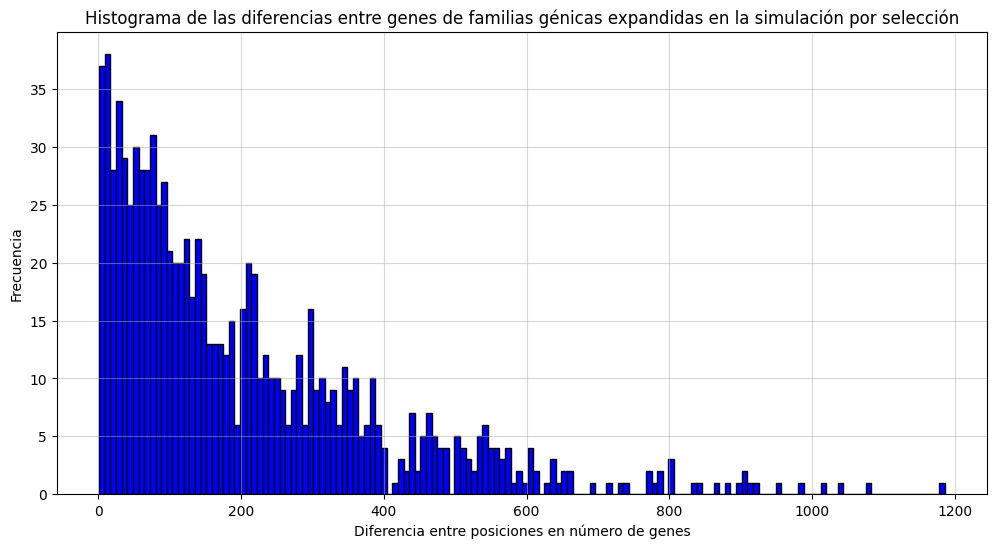

In [46]:
# Crear una lista con todas las diferencias
diferencias = [d for diferencias_genoma in resultados_diferencias_duplicados.values() for d in diferencias_genoma]


# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(diferencias, bins=150, color='blue', edgecolor='black')
plt.title("Histograma de las diferencias entre genes de familias génicas expandidas en la simulación por selección")
plt.xlabel("Diferencia entre posiciones en número de genes")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.5)
plt.savefig('resultados_simulación/histograma_simulación_selección.png',dpi = 150)
plt.show()


Resultados del ajuste:

Distribución          AIC        KS-Stat      KS-pvalue                    Parámetros
-------------------------------------------------------------------------------------
Exponencial      12085.76         0.0269         0.4832                1.000, 202.818
Gamma            12079.88         0.0319         0.2799         0.954, 1.000, 211.590
Log-normal       12176.29         0.0562         0.0045       0.935, -16.626, 149.360
Weibull          12087.70         0.0256         0.5487         1.009, 0.994, 203.536


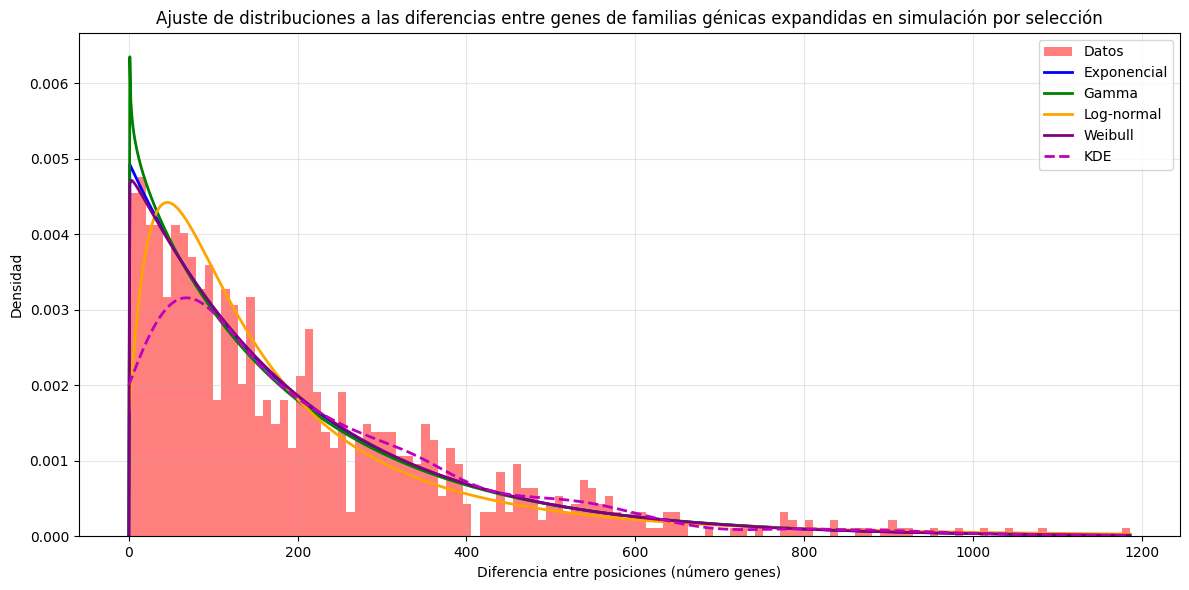

In [50]:
from scipy.stats import expon, gamma, lognorm, weibull_min, gaussian_kde, kstest
# Suponiendo que ya tienes esto:
diferencias = [d for diferencias_genoma in resultados_diferencias_duplicados.values() for d in diferencias_genoma]
datos_simulacion = np.array(diferencias)

# Rango para graficar
x = np.linspace(0, max(datos_simulacion), 1000)

# KDE
kde = gaussian_kde(datos_simulacion)
kde_pdf = kde(x)

# Diccionario de distribuciones a evaluar
distribuciones = {
    "Exponencial": expon,
    "Gamma": gamma,
    "Log-normal": lognorm,
    "Weibull": weibull_min
}

# Resultados
resultados = {}

# Evaluar cada distribución
for nombre, dist in distribuciones.items():
    try:
        params = dist.fit(datos_simulacion)
        pdf = dist.pdf(x, *params)
        loglik = np.sum(dist.logpdf(datos_simulacion, *params))
        k = len(params)
        aic = 2 * k - 2 * loglik
        ks_stat, ks_p = kstest(datos_simulacion, dist.name, args=params)

        resultados[nombre] = {
            "params": params,
            "pdf": pdf,
            "loglik": loglik,
            "aic": aic,
            "ks_stat": ks_stat,
            "ks_pvalue": ks_p
        }

    except Exception as e:
        print(f"Error con {nombre}: {e}")

# Imprimir tabla de resultados con parámetros
print("\nResultados del ajuste:\n")
print(f"{'Distribución':<15}{'AIC':>10}{'KS-Stat':>15}{'KS-pvalue':>15}{'Parámetros':>30}")
print("-" * 85)
for nombre, res in resultados.items():
    params_str = ", ".join([f"{p:.3f}" for p in res['params']])
    print(f"{nombre:<15}{res['aic']:>10.2f}{res['ks_stat']:>15.4f}{res['ks_pvalue']:>15.4f}{params_str:>30}")


# Graficar
plt.figure(figsize=(12, 6))
plt.hist(datos_simulacion, bins=120, alpha=0.5, color='red', density=True, label='Datos')

# Graficar cada PDF ajustada
colores = ['b', 'g', 'orange', 'purple']
#colores = ['white', 'white', 'white', 'white']
for (nombre, res), color in zip(resultados.items(), colores):
    plt.plot(x, res['pdf'], label=f"{nombre}", lw=2, color=color)

# Graficar KDE
plt.plot(x, kde_pdf, 'm--', lw=2, label='KDE')

plt.title("Ajuste de distribuciones a las diferencias entre genes de familias génicas expandidas en simulación por selección")
plt.xlabel("Diferencia entre posiciones (número genes)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("resultados_simulación/ajuste_dist_diferencias_simulación_selección.png", dpi=150)
plt.show()

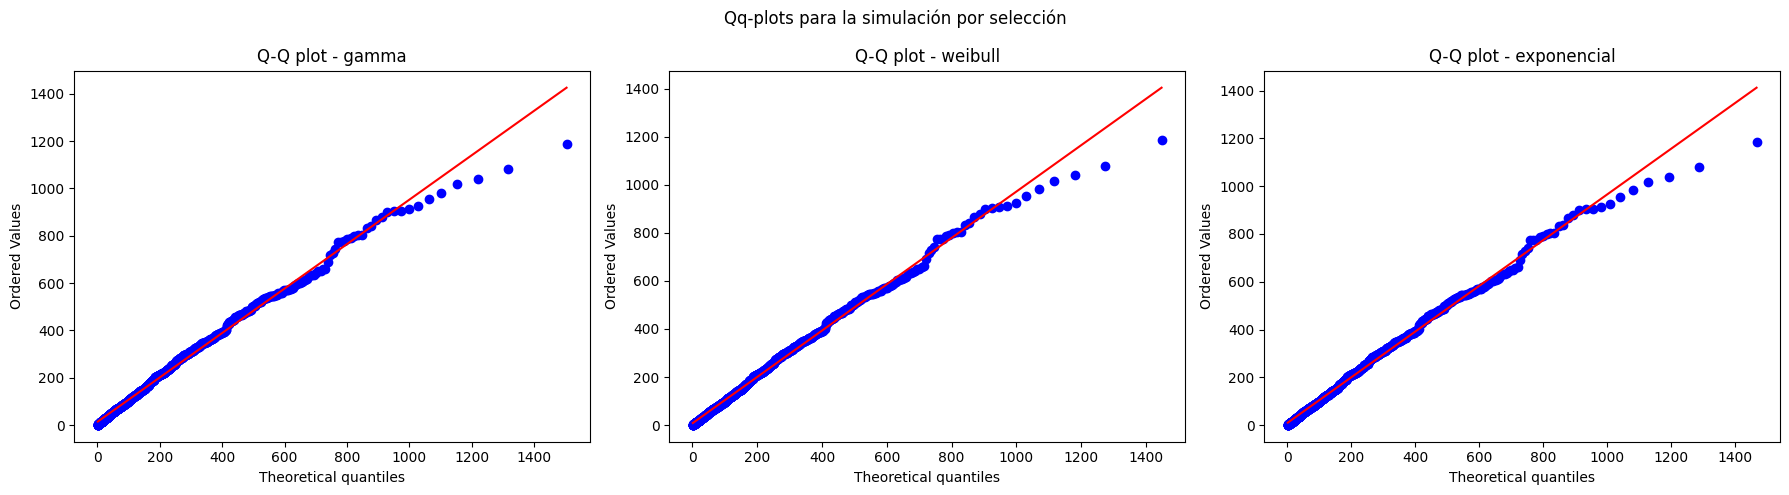

In [51]:
import matplotlib.pyplot as plt
from scipy import stats

# Ajustamos las tres distribuciones
params_gamma = stats.gamma.fit(datos_simulacion)
params_weibull = stats.weibull_min.fit(datos_simulacion)
params_expon = stats.expon.fit(datos_simulacion)

# Crear Q-Q plots para las tres distribuciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Qq-plots para la simulación por selección')
# weibull
stats.probplot(datos_simulacion, dist=stats.gamma, sparams=params_gamma, plot=axes[0])
axes[0].set_title("Q-Q plot - gamma")

# loggamma
stats.probplot(datos_simulacion, dist=stats.weibull_min, sparams=params_weibull, plot=axes[1])
axes[1].set_title("Q-Q plot - weibull")

# johnsonsu
stats.probplot(datos_simulacion, dist=stats.expon, sparams=params_expon, plot=axes[2])
axes[2].set_title("Q-Q plot - exponencial")

plt.tight_layout()
plt.savefig('resultados_simulación/qq_plots_simulación_slección_sin_transformacion.png',dpi=200)
plt.show()

In [69]:
print("Parámetros gamma:", params_gamma)
print("Parámetros Weibull:", params_weibull)
print("Parámetros exponencial:", params_expon)

Parámetros gamma: (1.0589076656976186, 0.966458422300762, 191.56699085075985)
Parámetros Weibull: (0.9876368531299182, 2.999999999999999, 202.29683452434028)
Parámetros exponencial: (1.0, 202.8181818181818)


/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/opt/tljh/user/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Resultados con KS p-valor > 0.05:

Distribución: gengamma
  AIC: 2962.49
  KS D: 0.0153
  KS p-valor: 0.9766

Distribución: johnsonsu
  AIC: 2965.70
  KS D: 0.0185
  KS p-valor: 0.8928

Distribución: loggamma
  AIC: 2965.57
  KS D: 0.0188
  KS p-valor: 0.8804

Distribución: beta
  AIC: 2963.78
  KS D: 0.0190
  KS p-valor: 0.8730

Distribución: weibull
  AIC: 2965.92
  KS D: 0.0216
  KS p-valor: 0.7527


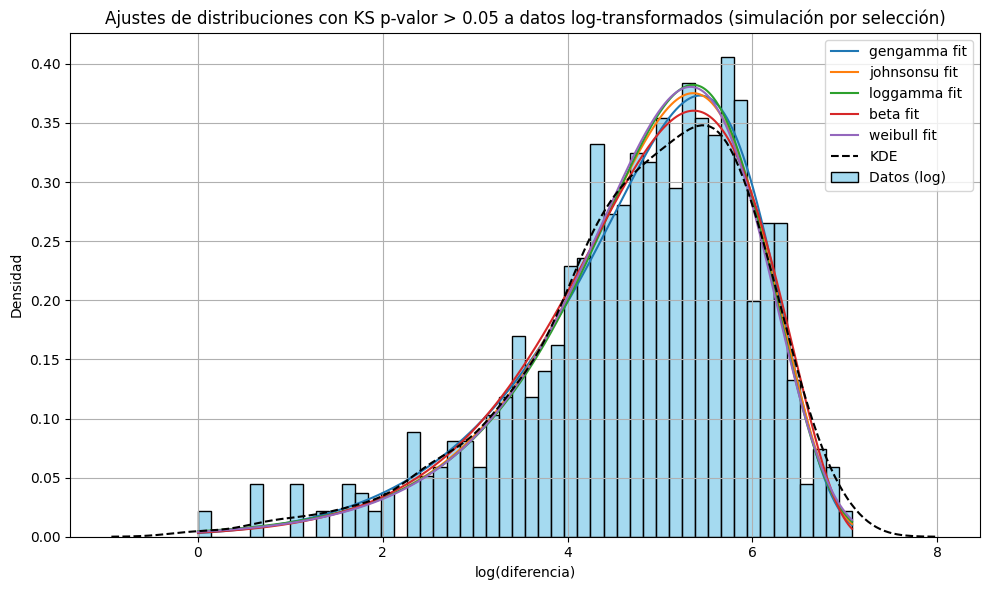

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Suponiendo que ya tienes definida la variable: datos_simulacion
log_diffs_simulacion = np.log(datos_simulacion)

# Diccionario de distribuciones
distribuciones = {
    'lognorm': stats.lognorm,
    'gamma': stats.gamma,
    'weibull': stats.weibull_min,
    'beta': stats.beta,
    'norm': stats.norm,
    'expon': stats.expon,
    'loggamma': stats.loggamma,
    'gengamma': stats.gengamma,
    'johnsonsu': stats.johnsonsu
}

# Almacenar resultados
resultados_simulacion = {}

for nombre, dist in distribuciones.items():
    try:
        params = dist.fit(log_diffs_simulacion)
        log_likelihood = np.sum(dist.logpdf(log_diffs_simulacion, *params))
        k = len(params)
        AIC = 2 * k - 2 * log_likelihood
        D, p_ks = stats.kstest(log_diffs_simulacion, dist.name, args=params)

        # Guardar solo si el p-valor es mayor a 0.05
        if p_ks > 0.05:
            resultados_simulacion[nombre] = {
                'params': params,
                'AIC': AIC,
                'KS D': D,
                'KS p-value': p_ks
            }
    except Exception as e:
        print(f"Error ajustando {nombre}: {e}")

# Mostrar solo resultados con p-valor > 0.05, ordenados por p-valor descendente
print("Resultados con KS p-valor > 0.05:")
for nombre in sorted(resultados_simulacion, key=lambda x: resultados_simulacion[x]['KS p-value'], reverse=True):
    res = resultados_simulacion[nombre]
    print(f"\nDistribución: {nombre}")
    print(f"  AIC: {res['AIC']:.2f}")
    print(f"  KS D: {res['KS D']:.4f}")
    print(f"  KS p-valor: {res['KS p-value']:.4f}")

# Preparar figura
plt.figure(figsize=(10, 6))
sns.histplot(log_diffs_simulacion, bins=50, kde=False, stat='density',
             color='skyblue', label='Datos (log)', edgecolor='black')

# Eje X para las curvas de densidad
x_vals = np.linspace(min(log_diffs_simulacion), max(log_diffs_simulacion), 1000)

# Graficar solo distribuciones válidas
for nombre in sorted(resultados_simulacion, key=lambda x: resultados_simulacion[x]['KS p-value'], reverse=True):
    dist = distribuciones[nombre]
    params = resultados_simulacion[nombre]['params']
    plt.plot(x_vals, dist.pdf(x_vals, *params), label=f'{nombre} fit')

# KDE para comparación
sns.kdeplot(log_diffs_simulacion, color='black', linestyle='--', label='KDE')

# Estética del gráfico
plt.title("Ajustes de distribuciones con KS p-valor > 0.05 a datos log-transformados (simulación por selección)")
plt.xlabel("log(diferencia)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('resultados_simulación/ajuste_log_simulacion_selección.png',dpi=150)
plt.show()


AIC: 12091.9664
KS Statistic: 0.0153
KS p-value: 0.9766
Parámetros (a, c, loc, scale): (0.41459991271429597, 15.55614988493618, -3.4549649826068065, 9.508492102309729)


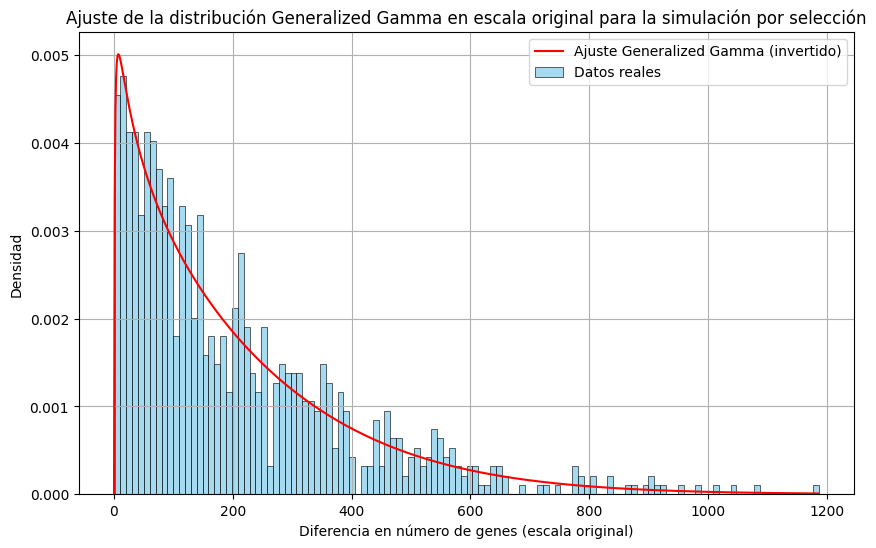

In [61]:
from scipy.stats import gengamma, kstest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transformar los datos a escala logarítmica
log_diffs = np.log(datos_simulacion)

# 2. Ajustar la distribución gengamma en escala logarítmica
params = gengamma.fit(log_diffs)

# 3. PDF y CDF en escala original aplicando el cambio de variable
def pdf_original(x):
    y = np.log(x)
    return gengamma.pdf(y, *params) / x  # Regla del cambio de variable

def cdf_original(x):
    y = np.log(x)
    return gengamma.cdf(y, *params)

# 4. AIC en escala original
log_probs = np.log(pdf_original(datos_simulacion))
log_likelihood = np.sum(log_probs)
k = len(params)
aic = 2 * k - 2 * log_likelihood

# 5. Prueba KS en escala original
ks_stat, ks_p_value = kstest(datos_simulacion, cdf_original)

# 6. Resultados
print(f"AIC: {aic:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"KS p-value: {ks_p_value:.4f}")
print(f"Parámetros (a, c, loc, scale): {params}")

# 7. Gráfico
x_vals = np.linspace(0.01, np.max(datos_simulacion), 1000)  # evitar log(0)
plt.figure(figsize=(10, 6))
sns.histplot(datos_simulacion, bins=120, stat='density', color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x_vals, pdf_original(x_vals), color='red', label='Ajuste Generalized Gamma (invertido)')
plt.xlabel('Diferencia en número de genes (escala original)')
plt.ylabel('Densidad')
plt.title('Ajuste de la distribución Generalized Gamma en escala original para la simulación por selección')
plt.legend()
plt.grid(True)
plt.savefig('resultados_simulación/ajuste_gengamma_invertido_simulacion_seleccion.png', dpi=150)
plt.show()


AIC: 12095.183278586705
KS Statistic: 0.018492174450383425
KS p-value: 0.8927961750435986


/tmp/ipykernel_1465069/2142526373.py:11: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
/tmp/ipykernel_1465069/2142526373.py:12: RuntimeWarning: invalid value encountered in divide
  return johnsonsu.pdf(y, *params) / x


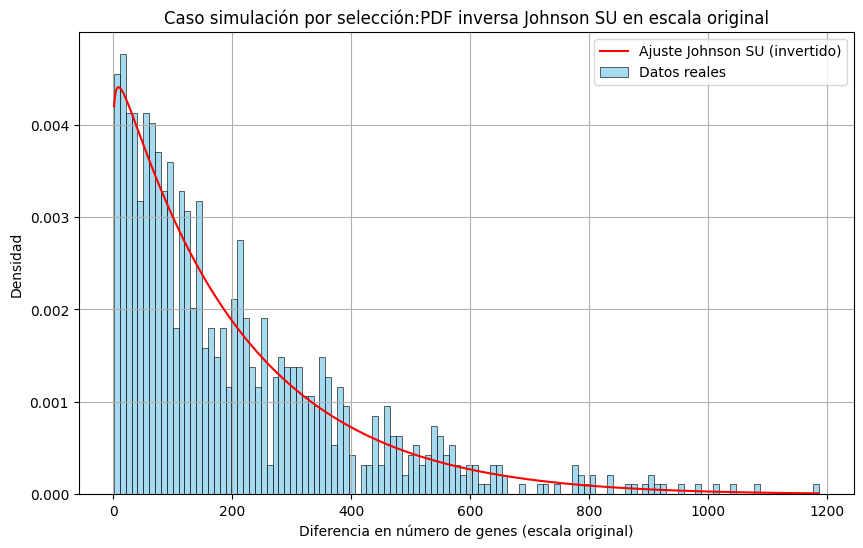

In [62]:
from scipy.stats import johnsonsu, kstest

# 1. Transformación de los datos
log_diffs = np.log(datos_simulacion)

# 2. Ajuste de la distribución Johnson SU en escala logarítmica
params = johnsonsu.fit(log_diffs_simulacion)

# 3. PDF y CDF en escala original (invirtiendo log1p)
def pdf_original(x):
    y = np.log(x)
    return johnsonsu.pdf(y, *params) / x

def cdf_original(x):
    y = np.log(x)
    return johnsonsu.cdf(y, *params)

# 4. AIC en escala original
log_probs = np.log(pdf_original(diferencias))
log_likelihood = np.sum(log_probs)
k = len(params)
aic = 2 * k - 2 * log_likelihood

# 5. Prueba KS en escala original
ks_stat, ks_p_value = kstest(datos_simulacion, cdf_original)

# 6. Resultados
print(f"AIC: {aic}")
print(f"KS Statistic: {ks_stat}")
print(f"KS p-value: {ks_p_value}")

# 7. Gráfico
x_vals = np.linspace(0, np.max(diferencias), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(diferencias, bins=120, stat='density', color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x_vals, pdf_original(x_vals), color='red', label='Ajuste Johnson SU (invertido)')
plt.xlabel('Diferencia en número de genes (escala original)')
plt.ylabel('Densidad')
plt.title('Caso simulación por selección:PDF inversa Johnson SU en escala original')
plt.legend()
plt.grid(True)
plt.savefig('resultados_simulación/ajuste_datos_johson_su_quitando_log_simulacion_sleccion.png',dpi=150)
plt.show()

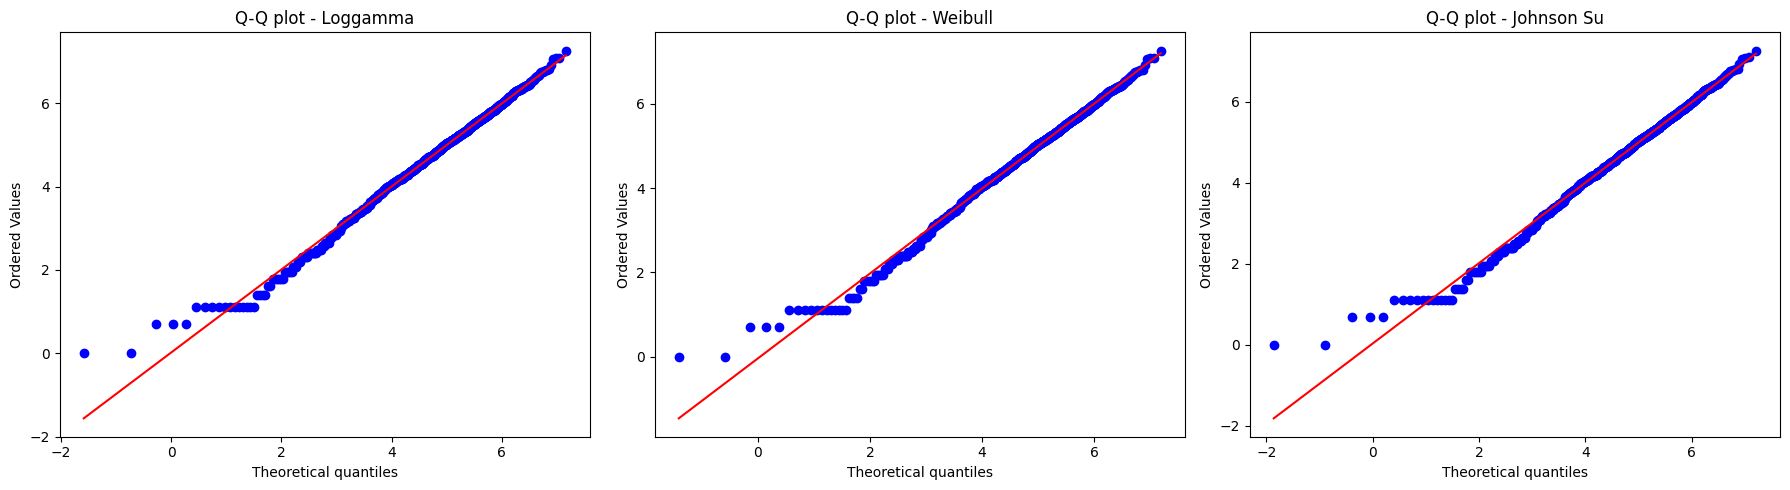

In [66]:
import matplotlib.pyplot as plt
from scipy import stats

# Ajustamos las tres distribuciones
params_loggamma = stats.loggamma.fit(log_diffs_simulacion)
params_weibull = stats.weibull_min.fit(log_diffs_simulacion)
params_johnsonsu = stats.johnsonsu.fit(log_diffs_simulacion)

# Crear Q-Q plots para las tres distribuciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# loggamma
stats.probplot(log_diffs_simulacion, dist=stats.loggamma, sparams=params_loggamma, plot=axes[0])
axes[0].set_title("Q-Q plot - Loggamma")

# weibull
stats.probplot(log_diffs_simulacion, dist=stats.weibull_min, sparams=params_weibull, plot=axes[1])
axes[1].set_title("Q-Q plot - Weibull")

# johnsonsu
stats.probplot(log_diffs_simulacion, dist=stats.johnsonsu, sparams=params_johnsonsu, plot=axes[2])
axes[2].set_title("Q-Q plot - Johnson Su")

plt.tight_layout()
plt.show()


In [67]:
print("Parámetros Loggamma:", params_loggamma)
print("Parámetros Weibull:", params_weibull)
print("Parámetros Johnson SU:", params_johnsonsu)

Parámetros Loggamma: (0.9114795774659414, 5.447817533558622, 0.8825207882598813)
Parámetros Weibull: (3508901.388799078, -3278432.690181321, 3278438.0335373078)
Parámetros Johnson SU: (3.323504713819661, 2.3875097674033876, 7.276735202183891, 1.2020573082837354)


In [45]:
%autosave 30

Autosaving every 30 seconds
